# 고급회귀분석 실습 CH06, CH07

SEOYEON CHOI  
2022-11-14

chapter 6, chapter 7

In [1]:
library(MASS)

In [2]:
data(Boston)

In [3]:
head(Boston)

In [4]:
nrow(Boston)

506

보스턴 집값 데이터 이 데이터는 보스턴 근교 지역의 집값 및 다른 정보를
포함한다.

MASS 패키지를 설치하면 데이터를 로딩할 수 있다.

B보스턴 근교 506개 지역에 대한 범죄율 (crim)등 14개의 변수로 구성

• crim : 범죄율

• zn: 25,000평방비트 기준 거지주 비율

• indus: 비소매업종 점유 구역 비율

• chas: 찰스강 인접 여부 (1=인접, 0=비인접)

• nox: 일산화질소 농도 (천만개 당)

• rm: 거주지의 평균 방 갯수 \*\*\*

• age: 1940년 이전에 건축된 주택의 비율

• dis: 보스턴 5대 사업지구와의 거리

• rad: 고속도로 진입용이성 정도

• tax: 재산세율 (10,000달러 당)

• ptratio: 학생 대 교사 비율

• black: 1000(B − 0.63)2, B: 아프리카계 미국인 비율

• lstat : 저소득층 비율 \*\*\*\*

• medv: 주택가격의 중앙값 (단위:1,000달러 당)

-   데이터 세 변수만 가지고 산점도 그려보기

-   음의 상관관계가 있는 것 같기도 하고~

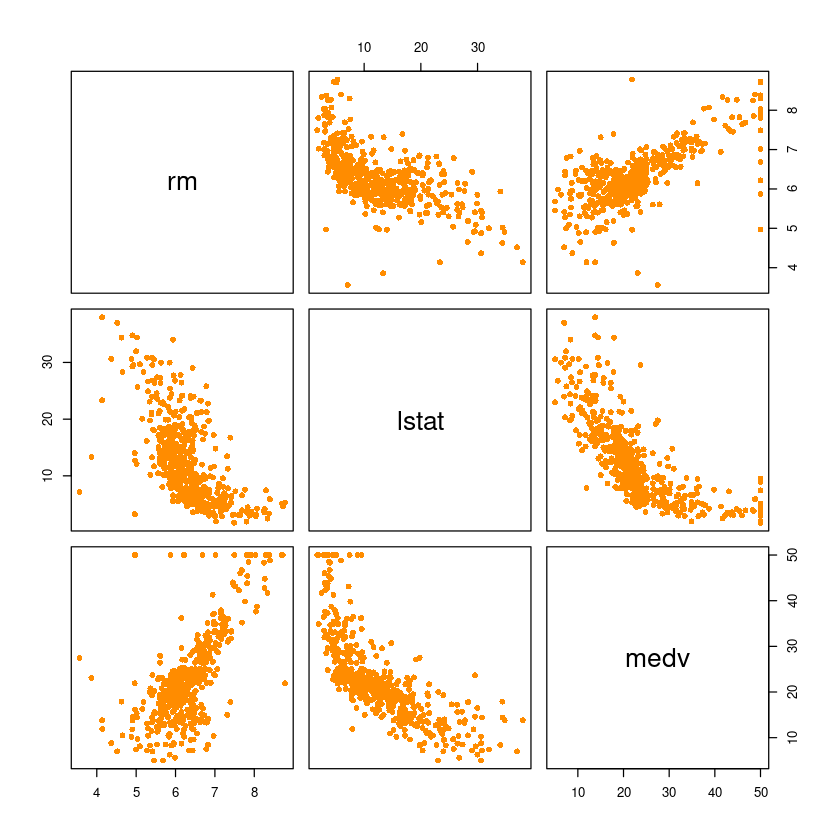

In [5]:
pairs(Boston[,which(names(Boston) %in% c('medv', 'rm', 'lstat'))], pch=16, col='darkorange')

-   lm(y ~ x_1 + x_2, data)

In [6]:
fit_Boston<-lm(medv~rm+lstat, data=Boston)

-   `F-statistic: 444.3 on 2 and 503 DF,  p-value: < 2.2e-16`
-   `R-squared:  0.6386`
    -   집값 y의 총변동 중에 회귀모형이 63.86%정도 설명하고 있다.
-   `Adjusted R-squared:  0.6371`
    -   설명변수가 증가하면 R-squared값이 증가하는 현상때문에 수정된
        R-squared값이 필요
    -   모형 비교시 Adjusted R-squared가 나을 수도 있음
-   rm,lstat의 p-value `<2e-16`

In [7]:
summary(fit_Boston)


Call:
lm(formula = medv ~ rm + lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.076  -3.516  -1.010   1.909  28.131 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.35827    3.17283  -0.428    0.669    
rm           5.09479    0.44447  11.463   <2e-16 ***
lstat       -0.64236    0.04373 -14.689   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.54 on 503 degrees of freedom
Multiple R-squared:  0.6386,    Adjusted R-squared:  0.6371 
F-statistic: 444.3 on 2 and 503 DF,  p-value: < 2.2e-16

-   원하는 변수만 추출해내서 회귀분석 진행가능

In [12]:
dt <- Boston[,which(names(Boston) %in% c('medv', 'rm', 'lstat'))]

In [13]:
head(dt)

-   `.` 쓰면 설명변수 다 쓰겠다는 의미

In [10]:
fit_Boston<-lm(medv~., data=dt)

$\hat{y} = -1.3583 + 5.0948*rm - 0.6424*lstat$

-   저소득층이 변하지 않고 방이 하나 더 증가한다면 집값의 중앙값은
    5.0948 정도 증가한다.

-   방의 수는 변하지 않고 저소득층이 증가한다면 집값의 중앙값은 0.6424
    정도 감소한다.

-   SSR = 41308.84 = 20654.42 + 20654.42

-   **밑의 F 통계량이 아니라 summary 의 F 통계량을 봐야 한다.**

In [16]:
anova(fit_Boston)

$var(\hat{\beta}) = (X^TX)^{-1} \sigma^2$

In [17]:
vcov(fit_Boston)  

In [18]:
confint(fit_Boston, level = 0.95)

In [19]:
coef(fit_Boston) + qt(0.975, 503) * summary(fit_Boston)$coef[,2]

(Intercept) 4.87535465808389 rm 5.96802553290791 lstat -0.556439501179164

In [20]:
coef(fit_Boston) - qt(0.975, 503) * summary(fit_Boston)$coef[,2]

(Intercept) -7.59190028183298 rm 4.22155043576519 lstat -0.728277167309095

평균반응, 개별 y 추정

$E(Y|x_0), y = E(Y|x_0) + \epsilon$

In [22]:
new_dt <- data.frame(rm=7, lstat=10)

$\hat{y}_0 = -1.3583 + 5.0948*7 - 0.6424*10$

In [24]:
predict(fit_Boston, newdata = new_dt)

1: 27.88165973604

평균반응

In [25]:
predict(fit_Boston, 
        newdata = new_dt,
        interval = c("confidence"), 
        level = 0.95)  

개별 y

In [26]:
predict(fit_Boston, newdata = new_dt, 
        interval = c("prediction"), 
        level = 0.95)  

-   fit은 같고 lwr,upr만 달라진다.

잔차분석

$\epsilon$ : 선형성, 등분산성, 정규성, 독립성

``` r
yhat <- fitted_values(fit_Boston)
```

In [27]:
yhat <- fitted(fit_Boston)

In [28]:
res <- resid(fit_Boston)

잔차그림 - 대칭 아니다 - u 턴 커브 모형이다. - 애초에 산점도에서도
커브가 보였다. - 나중에 제곱텀 넣어볼 예정

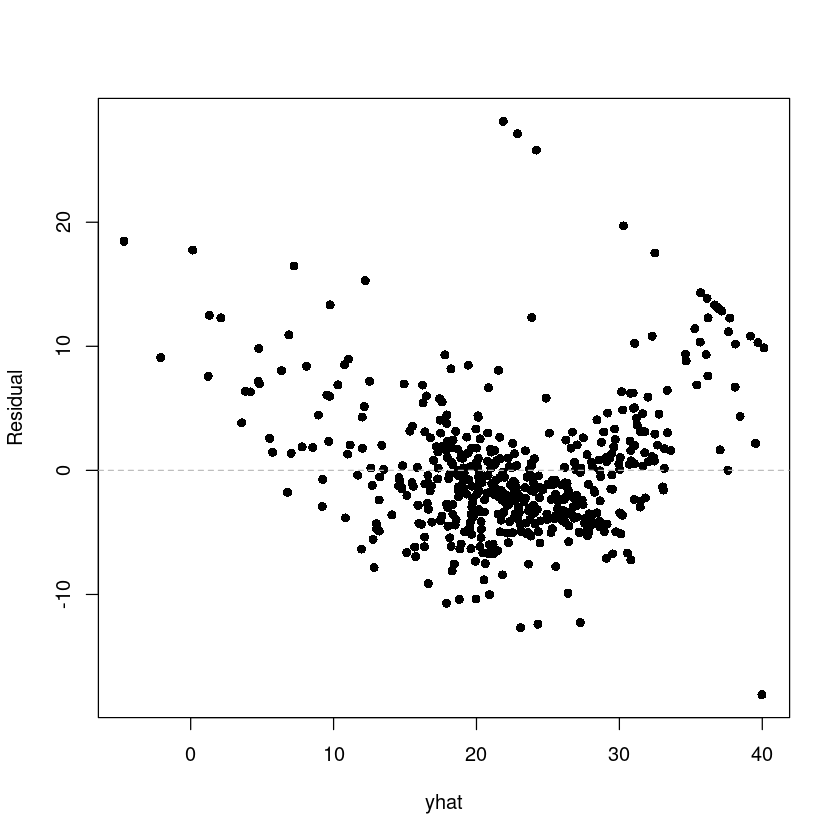

In [29]:
plot(res ~ yhat,pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')

-   제곱텀 필요해보인다.

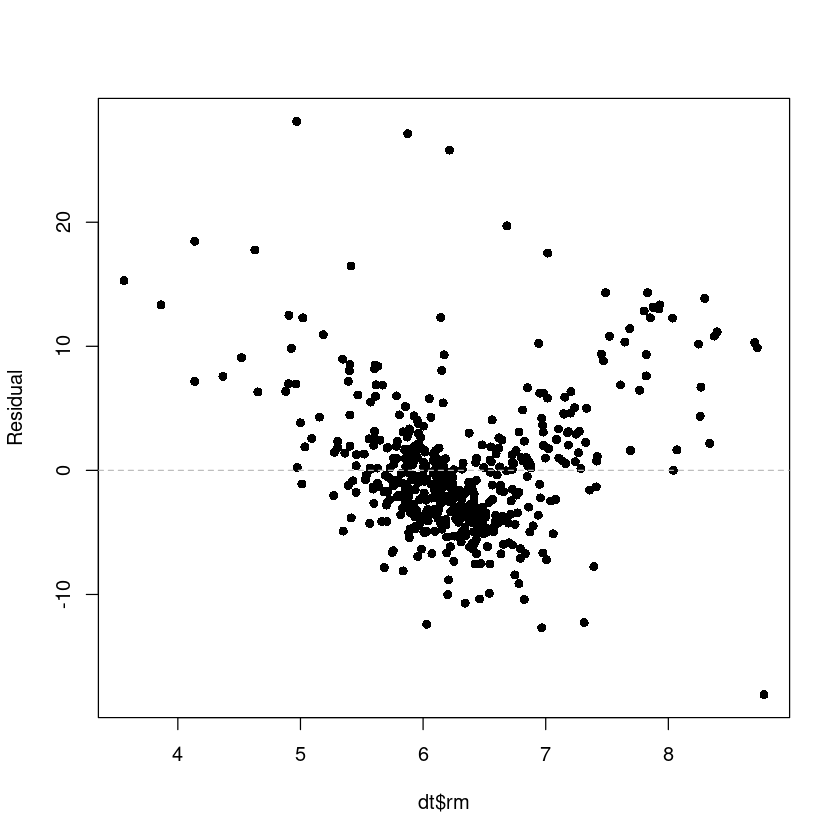

In [30]:
plot(res ~ dt$rm,pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')

-   제곱텀 필요해보인다.

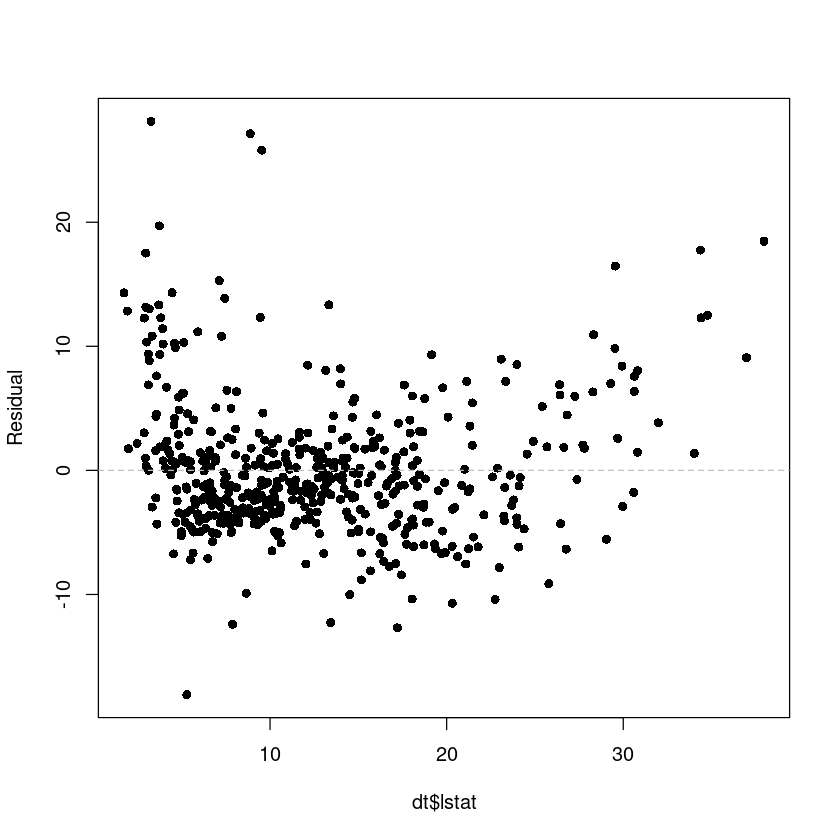

In [75]:
plot(res ~ dt$lstat,pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')

독립성검정 : DW test

In [33]:
library(lmtest)

$H_0 : \text{ uncorrelated vs } H_1 : \rho \neq 0$

In [34]:
dwtest(fit_Boston, alternative = "two.sided")  


    Durbin-Watson test

data:  fit_Boston
DW = 0.83421, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0

-   p-value \< 2.2e-16로 귀무가설 기각한다. 잔차는 독립이 아니다.

잔차의 QQ plot

정규성 확인 결과도 좋지 않음

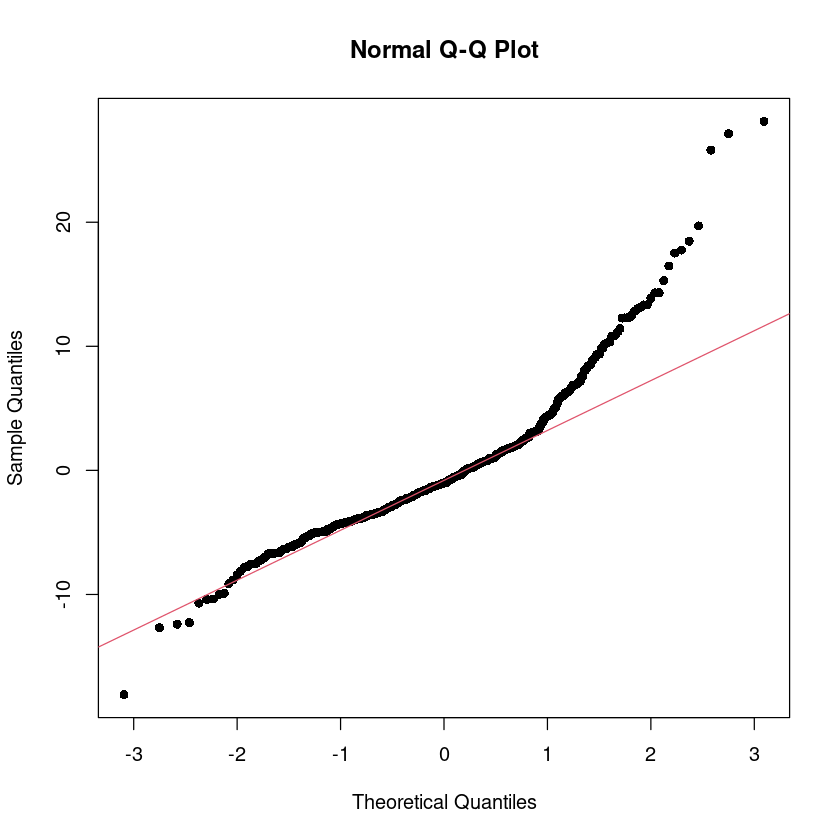

In [36]:
qqnorm(res, pch=16)
qqline(res, col = 2)

In [38]:
head(dt)

In [39]:
dt$lstat2 <- (dt$lstat)^2

In [40]:
head(dt)

1번 방법

In [41]:
fit_Boston2<-lm(medv~., data=dt)

``` r
# 이렇게 쓰면 위에와 결과 같음
fit_Boston2<-lm(medv~rm+lstat+lstat^2, data=Boston)
```

2번 방법 변수 생성 없이 수행가능

In [42]:
fit_Boston2<-lm(medv~rm+lstat+I(lstat^2), data=Boston)

-   `Adjusted R-squared:  0.7013`이 63%에서 증가한 모습

In [43]:
summary(fit_Boston2)


Call:
lm(formula = medv ~ rm + lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.1427  -3.2429  -0.4829   2.3607  27.0256 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.68964    3.13810   3.725 0.000217 ***
rm           4.22727    0.41172  10.267  < 2e-16 ***
lstat       -1.84863    0.12213 -15.136  < 2e-16 ***
I(lstat^2)   0.03634    0.00348  10.443  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.027 on 502 degrees of freedom
Multiple R-squared:  0.7031,    Adjusted R-squared:  0.7013 
F-statistic: 396.2 on 3 and 502 DF,  p-value: < 2.2e-16

In [44]:
yhat2 <- fitted.values(fit_Boston2)

In [45]:
res2 <- resid(fit_Boston2)

-   곡선 느낌은 사라지고 outlier는 보이고 있다.

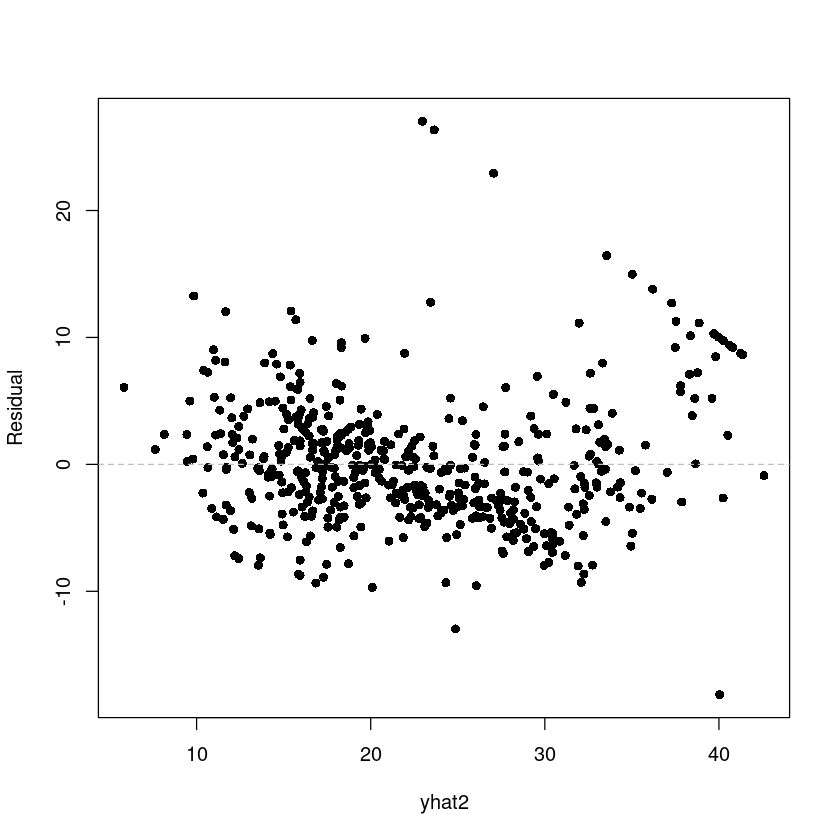

In [46]:
plot(res2 ~ yhat2,pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')

-   꼬리가 죽은 모습

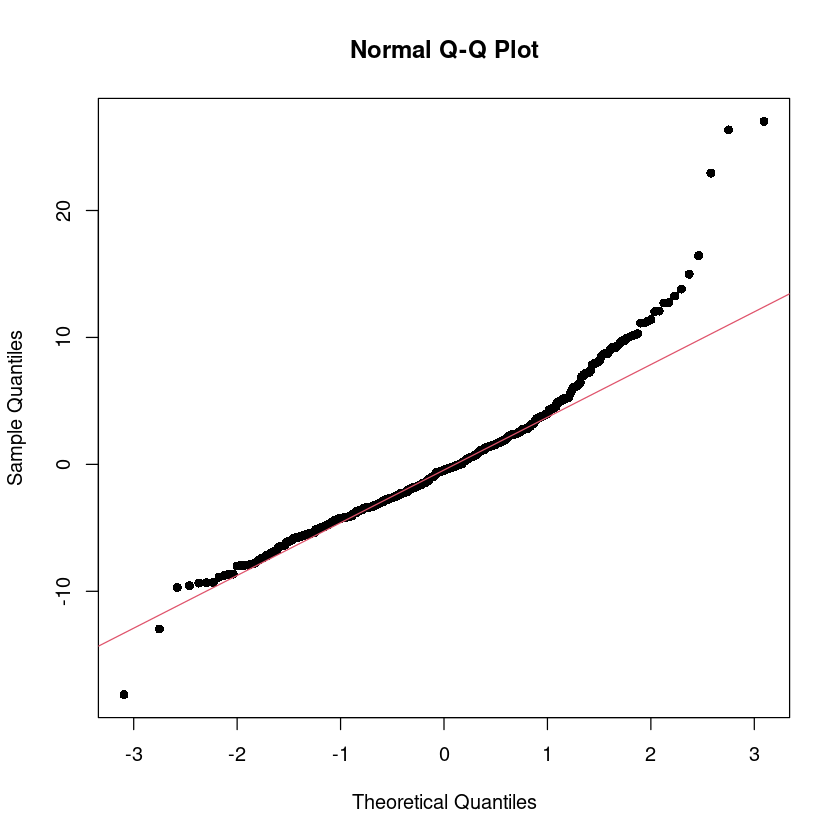

In [47]:
qqnorm(res2, pch=16)
qqline(res2, col = 2)

$H_0 : \text{ uncorrelated vs } H_1 : \rho \neq 0$

In [48]:
dwtest(fit_Boston2, alternative = "two.sided")


    Durbin-Watson test

data:  fit_Boston2
DW = 0.84831, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0

-   여전히 잔차가 독립이 아니고 기각한다.

In [49]:
fit_Boston3 <- lm(medv~rm, data=Boston)

In [50]:
fit_Boston4 <- lm(medv~lstat, data=Boston)

In [51]:
summary(fit_Boston3)


Call:
lm(formula = medv ~ rm, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.346  -2.547   0.090   2.986  39.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -34.671      2.650  -13.08   <2e-16 ***
rm             9.102      0.419   21.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.616 on 504 degrees of freedom
Multiple R-squared:  0.4835,    Adjusted R-squared:  0.4825 
F-statistic: 471.8 on 1 and 504 DF,  p-value: < 2.2e-16

In [52]:
summary(fit_Boston4)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,    Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16

In [54]:
x1<-c(4,8,9,8,8,12,6,10,6,9)
x2<-c(4,10,8,5,10,15,8,13,5,12)
y<-c(9,20,22,15,17,30,18,25,10,20)

FM

In [55]:
fit<-lm(y~x1+x2)

In [56]:
summary(fit)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4575 -1.9100  0.3314  0.6388  3.2628 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.6507     2.9075  -0.224   0.8293  
x1            1.5515     0.6462   2.401   0.0474 *
x2            0.7599     0.3968   1.915   0.0970 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.278 on 7 degrees of freedom
Multiple R-squared:  0.9014,    Adjusted R-squared:  0.8732 
F-statistic:    32 on 2 and 7 DF,  p-value: 0.0003011

In [57]:
anova(fit)

``` r
install.packages("car")
```

In [59]:
library(car)

$H_0 : T\times\beta = c$

\$b_1-b_2=0 (0,1,-1) \$

$H_0 : \beta_1 = \beta_2$

In [61]:
linearHypothesis(fit, c(0,1,-1), 0)

-   제약조건, T matrix c(0,1,-1)
-   c = 0

In [78]:
3.209014 / (36.32612/7)

0.618373170600108

같다~

$H_0 : \beta_1 = 1$

In [62]:
linearHypothesis(fit, c(0,1,0), 1)

-   기각하지 못함

$H_0 : \beta_1 = \beta_2 + 1$

In [63]:
linearHypothesis(fit, c(0,1,-1), 1)

In [80]:
F0

0.0428807391894599

$H_0 : \beta_1 = \beta_2 + 1$

$y = b_0 + b_1x_1 + b_2x_2 + \epsilon = b_0+x_1 + b_2(x_1+x_2)+\epsilon$

$y-x_1 = b_0+b_2(x_1+x_2)+\epsilon$ : RM

In [64]:
y1 <- y-x1
z1 <- x1 + x2

In [65]:
fit2 <- lm(y1~z1)

In [66]:
summary(fit2)


Call:
lm(formula = y1 ~ z1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5054 -1.9294  0.4236  0.6821  3.4473 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.0014     2.2175  -0.452 0.663574    
z1            0.6824     0.1242   5.493 0.000578 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.137 on 8 degrees of freedom
Multiple R-squared:  0.7904,    Adjusted R-squared:  0.7642 
F-statistic: 30.17 on 1 and 8 DF,  p-value: 0.0005785

In [67]:
anova(fit2)

FM

In [68]:
anova(fit)  

RM

In [69]:
anova(fit2)  

$F = {(SSE_RM - SSE_FM)/r} / {SSE_FM/(n-p-1)}$

SSE_FM

In [71]:
SSE_FM <- anova(fit)$Sum[3]  

SSE_RM

In [72]:
SSE_RM <- anova(fit2)$Sum[2]  

In [73]:
F0 <- (SSE_RM-SSE_FM)/(SSE_FM/7)
F0

0.0428807391894599

기각역 $F_{0.05}(1,7)$

In [74]:
qf(0.95, 1, 7)

5.59144785122073

기각할 수 없다.$\beta_1$은 $\beta_2$에 1 더한 값과 같다.